<a href="https://colab.research.google.com/github/chingya211/Gen-AI/blob/main/61308007E_%E5%B8%AB%E5%A4%A7%E8%B3%87%E6%95%99%E7%A2%A9%E4%B8%80_%E5%8A%89%E7%80%9E%E9%9B%85_AI%E4%BB%A3%E7%90%86%E8%A8%AD%E8%A8%88%E6%A8%A1%E5%BC%8FTwo_Stage_CoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯 任務說明：以懸疑故事來試驗Chain-of-Thought（CoT）的推理過程

#### 1. 讀入你的金鑰

請依你使用的服務, 決定讀入哪個金鑰

In [1]:
import os
from google.colab import userdata

In [47]:
#【使用 Mistral】
# api_key = userdata.get('Mistral')
# os.environ['MISTRAL']=api_key
# provider = "mistral"
# model = "ministral-8b-latest"

#【使用 OpenAI】
#api_key = userdata.get('OpenAI')
#os.environ['OPENAI_API_KEY']=api_key
#provider = "openai"
#model = "gpt-4o"

#【使用 Groq】
api_key = userdata.get('Groq')
os.environ['GROQ_API_KEY']=api_key
provider = "groq"
model = "llama3-70b-8192"

In [48]:
!pip install aisuite[all]

### 2. 使用 AISuite 的準備

In [49]:
import aisuite as ai

In [50]:
provider_planner = "groq"
model_planner="llama3-70b-8192"

provider_writer = "groq"
model_writer = "llama3-70b-8192"

#provider_reviewer = "openai"
#model_reviewer = "gpt-4o"

In [51]:
def reply(system="請用台灣習慣的中文回覆。",
          prompt="Hi",
          provider="groq",
          model="llama3-70b-8192"
          ):

    client = ai.Client()

    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": prompt}
    ]


    response = client.chat.completions.create(model=f"{provider}:{model}", messages=messages)

    return response.choices[0].message.content

####  3. 打造二階段

In [69]:
system_planner = "以中文來回答，你將扮演一個名偵探柯南的角色，針對事情解說疑點，請以條列式的方式列出組成懸疑故事的要點。請用台灣人習慣的用語回答。"
system_writer = "你是一位推理故事的說書人，用懸疑的口吻陳述故事，請整併這些要點，攥寫成事件內容。增加未知的神秘元素，營造劇情的緊張感。用「很久以前」作為開頭，以第一人稱的角度敘述，並在最後埋下伏筆，用開放式的結局讓人思考。"

In [70]:
def suspense_story(prompt):
    # Step 1: CoT - 思考懸疑故事的必要內容
    planning_prompt = f"使用者說：{prompt}。請思考組成懸疑故事的要點，並列點陳述。"
    suspense_composition = reply(system_planner, planning_prompt,
                          provider = provider_planner,
                          model = model_planner
                          )

    # Step 2: 利用元素組織成故事
    generation_prompt = f"這是懸疑故事的幾個要素：\n{suspense_composition}\n\n請根據這些條件，編排一個懸疑推理故事的情節。"
    suspense_story = reply(system_writer, generation_prompt,
                       provider = provider_writer,
                       model = model_writer
                       )

    return suspense_composition, suspense_story

### 4. 用 Gradio 打造你的對話機器人 Web App!

In [66]:
!pip install gradio

In [44]:
import gradio as gr

In [71]:
with gr.Blocks() as demo:
    gr.Markdown("### 真相永遠只有一個🕵️")
    gr.Markdown("說說你最近發生的事，讓名偵探柯南幫你找出答案！")
    user_input = gr.Textbox(label="發生的事情是…")
    btn = gr.Button("一起找出真相🔍 ")

    with gr.Row():
        out1 = gr.Textbox(label="疑點（Planning CoT）")
        out2 = gr.Textbox(label="說故事時間到（故事）")

    btn.click(suspense_story, inputs=[user_input], outputs=[out1, out2])

In [ ]:
demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://bae7b4d43b42f24138.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### 1. 解決以英文回應的問題-開頭再次強調使用中文
輸入事件：熱水器好像壞了，水忽冷忽熱的。

system_planner的prompt：「**以中文來回答，**你將扮演一個名偵探柯南的角色，針對事情解說疑點，請以條列式的方式列出組成懸疑故事的要點。請用台灣人習慣的用語回答。」

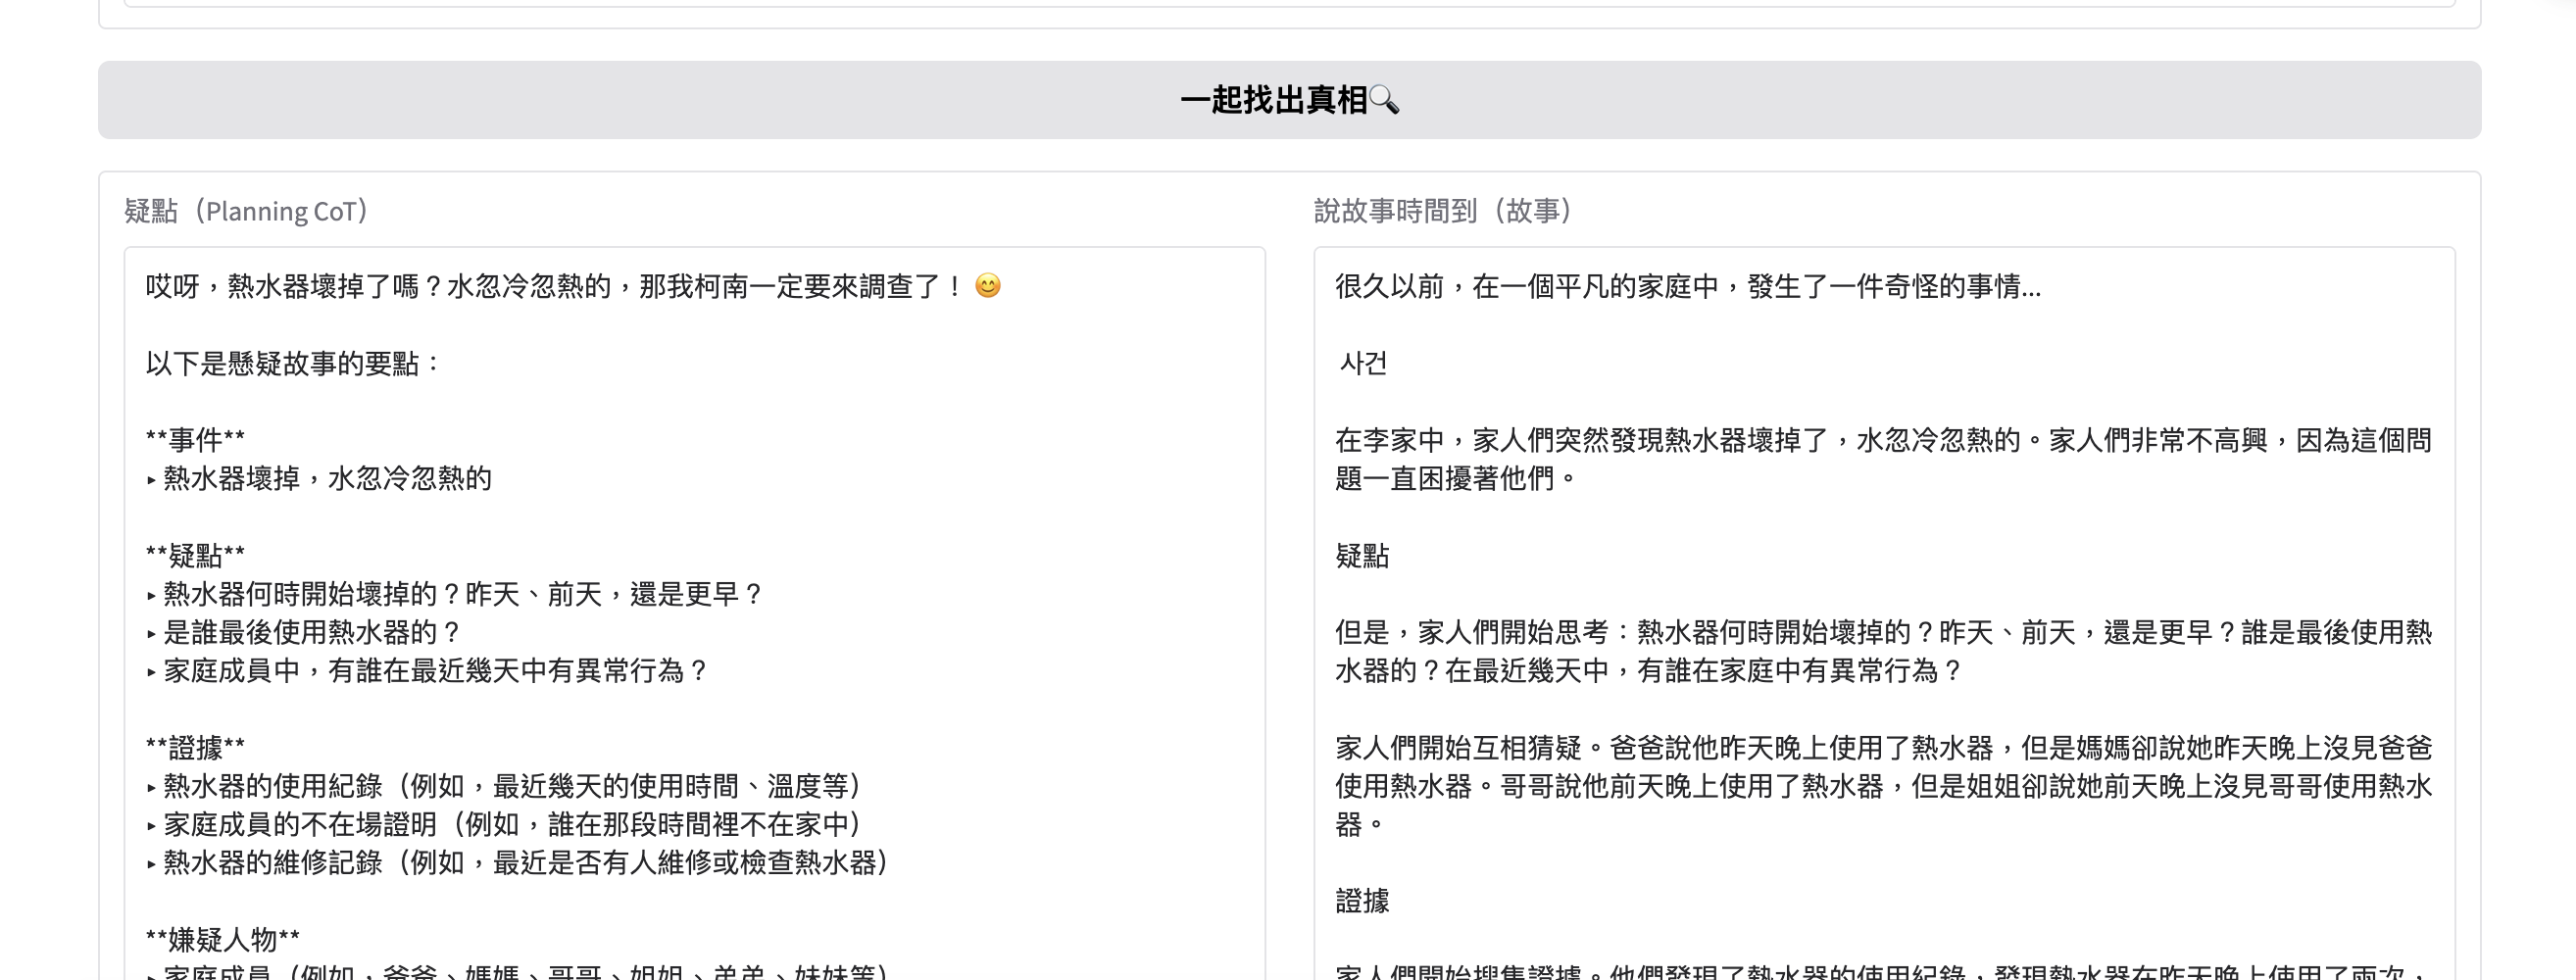

### 2. 避免和planning COT過於相像

輸入事件：桌上的乖乖不見了

system_writer設計:「你是一位推理故事的說書人，用懸疑的口吻陳述故事，請**整併這些要點，攥寫成事件內容。**用「很久以前」作為開頭。並在最後埋下伏筆，用開放式的結局讓人思考。」
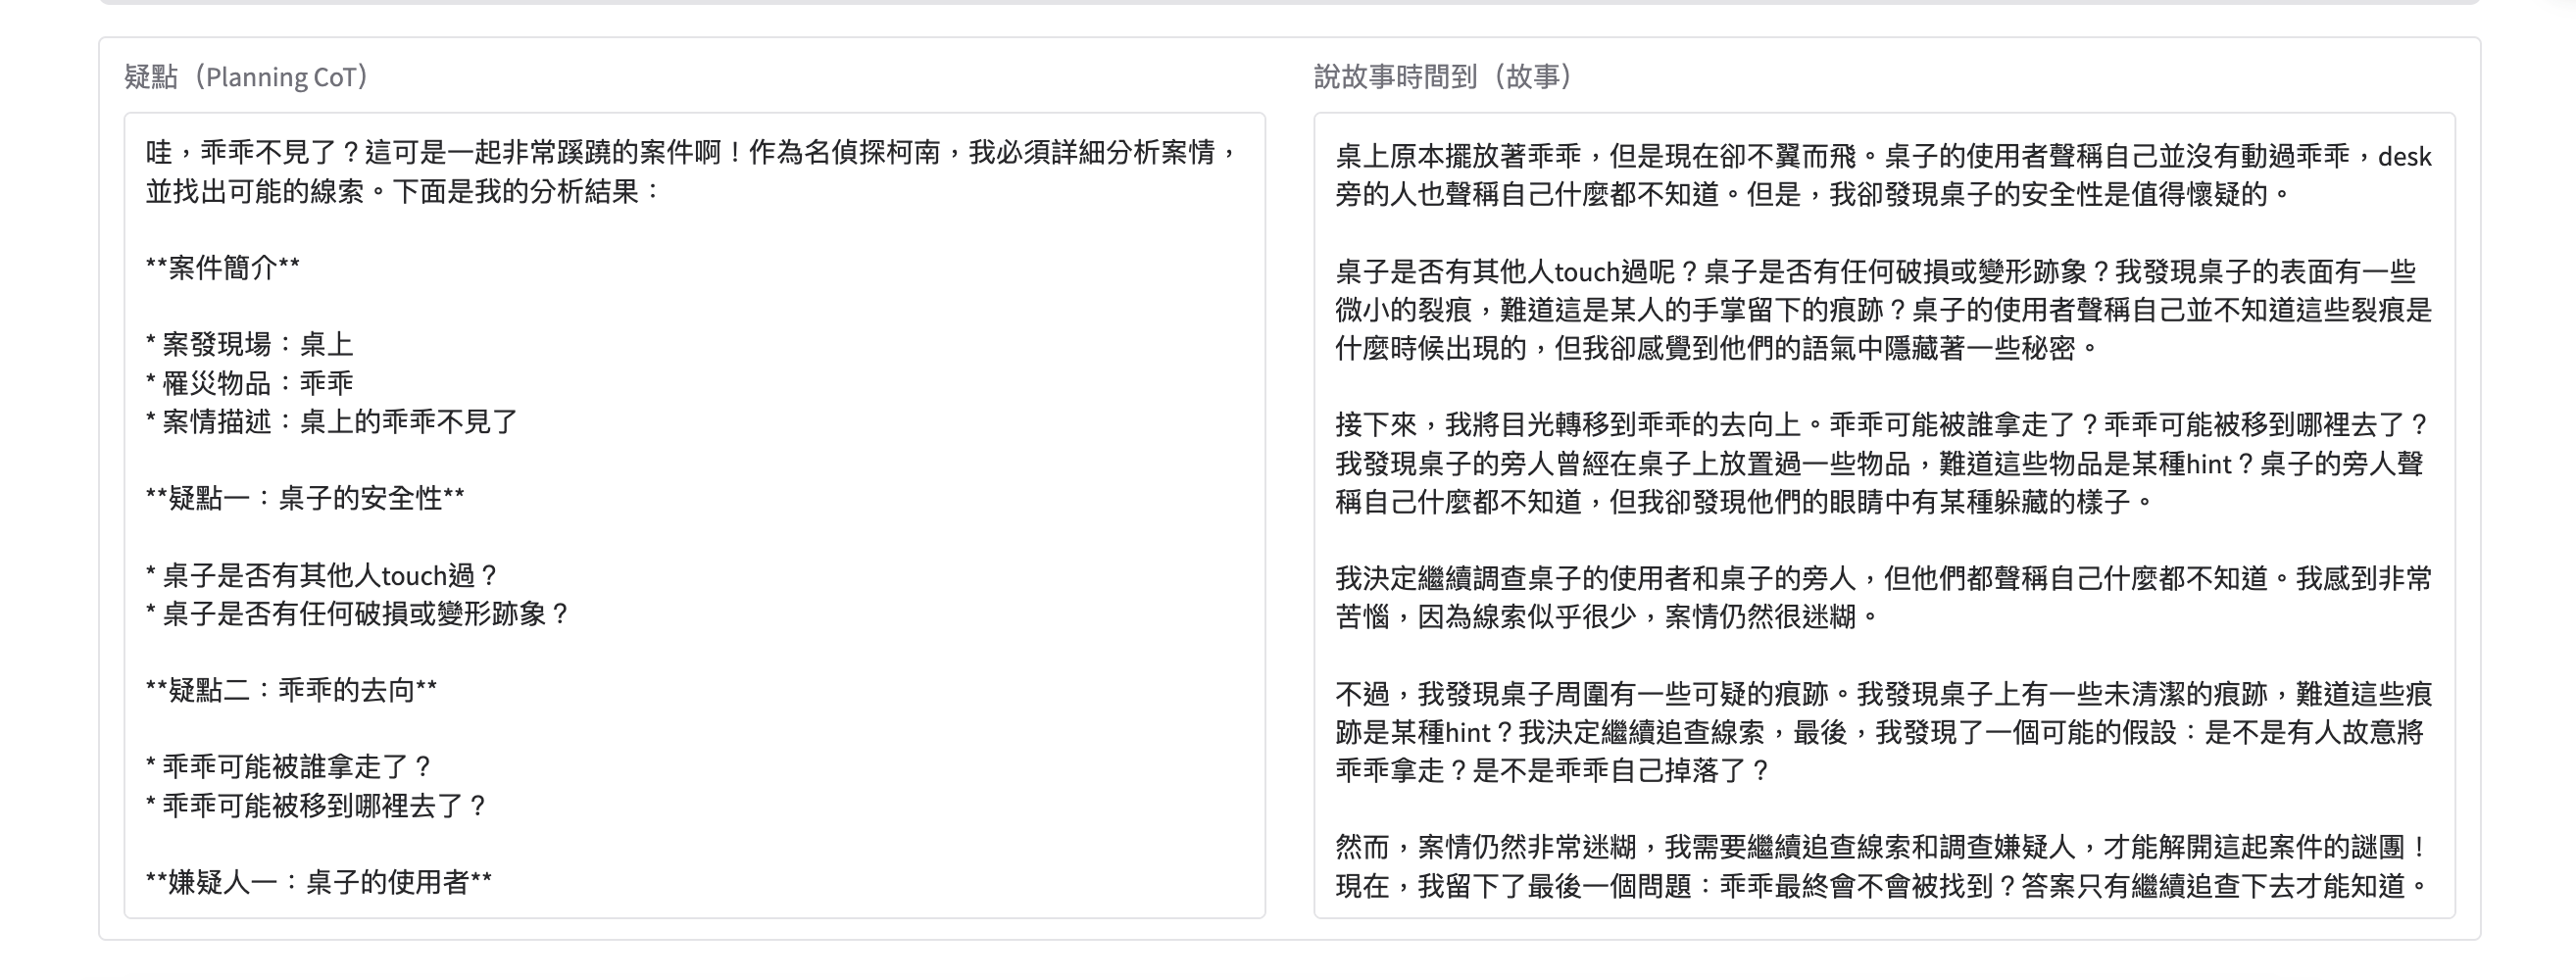

### 3. 營造緊張的氛圍
為了再加重懸疑緊張的氛圍，讓故事的產出以第一人稱視角來講述，並且鋪陳未知的內容。

將writer的prompt修改為：「你是一位推理故事的說書人，用懸疑的口吻陳述故事，請整併這些要點，攥寫成事件內容。增加未知的神秘元素，營造劇情的緊張感。用「很久以前」作為開頭，以第一人稱的角度敘述，並在最後埋下伏筆，用開放式的結局讓人思考。」

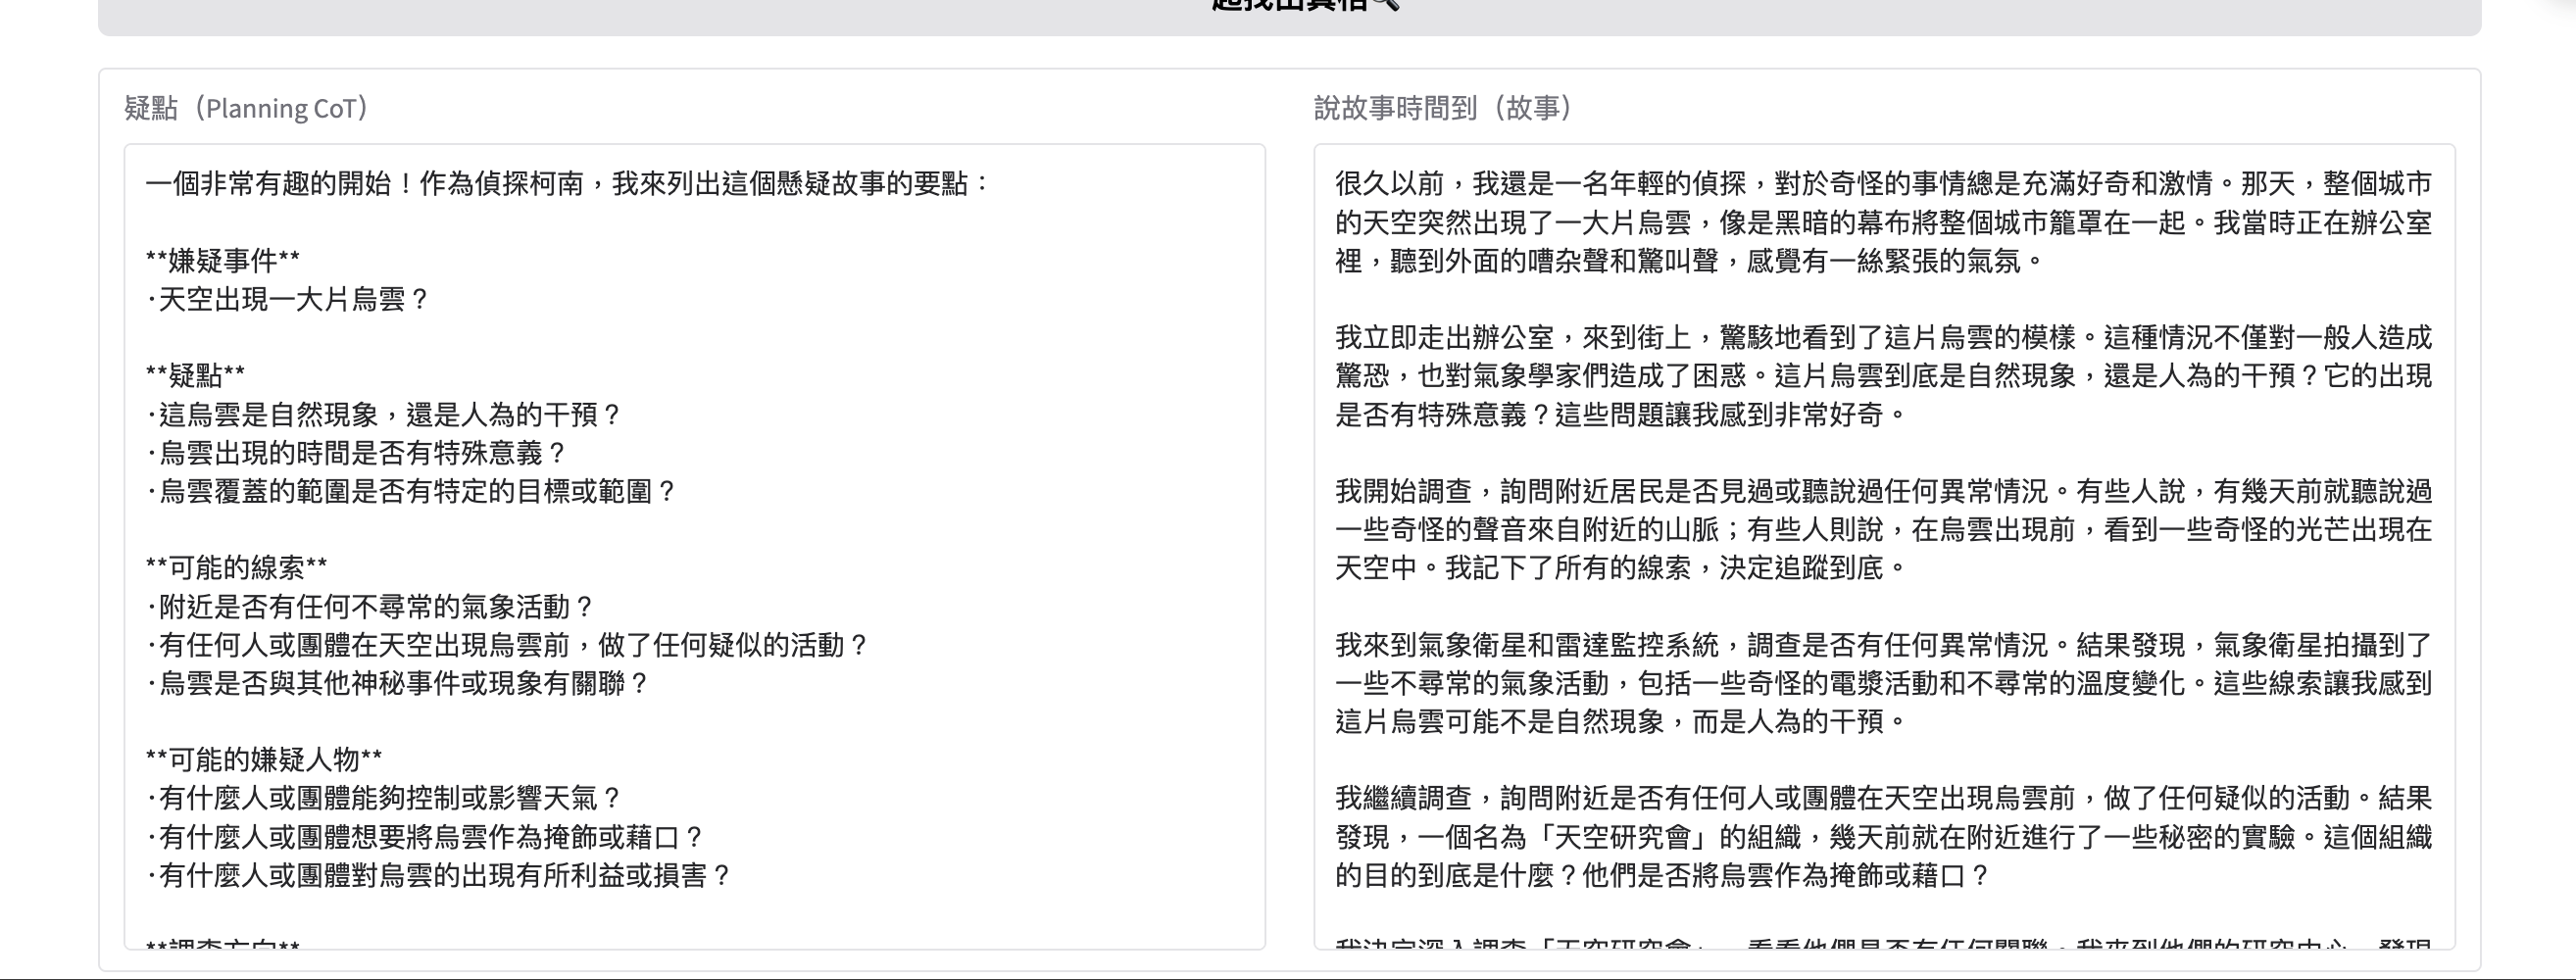